## 1. Importar Librerías

In [1]:
# importamos librerías #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# cargamos la df #
df = pd.read_csv('songs_normalize.csv')

In [3]:
df.head(4)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.347,0.544,119.992,"rock, metal"


In [4]:
# Diccionario de traducción de nombres de columnas
columna_traducida = {
    'artist': 'artista',
    'song': 'cancion',
    'duration_ms': 'duracion_ms',
    'explicit': 'explicito',
    'year': 'año',
    'popularity': 'popularidad',
    'danceability': 'bailabilidad',
    'energy': 'energia',
    'key': 'llave',
    'loudness': 'sonoridad',
    'mode': 'modo',
    'speechiness': 'texto_hablado',
    'acousticness': 'acustica',
    'instrumentalness': 'intrumentalidad',
    'liveness': 'vitalidad',
    'valence': 'positividad_musical',
    'tempo': 'tiempo',
    'genre': 'genero',
}

# Reemplazar los nombres de las columnas y guardarlo en una nueva variabl
df2 = df.rename(columns=columna_traducida)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artista              2000 non-null   object 
 1   cancion              2000 non-null   object 
 2   duracion_ms          2000 non-null   int64  
 3   explicito            2000 non-null   bool   
 4   año                  2000 non-null   int64  
 5   popularidad          2000 non-null   int64  
 6   bailabilidad         2000 non-null   float64
 7   energia              2000 non-null   float64
 8   llave                2000 non-null   int64  
 9   sonoridad            2000 non-null   float64
 10  modo                 2000 non-null   int64  
 11  texto_hablado        2000 non-null   float64
 12  acustica             2000 non-null   float64
 13  intrumentalidad      2000 non-null   float64
 14  vitalidad            2000 non-null   float64
 15  positividad_musical  2000 non-null   f

In [6]:
df2.shape

(2000, 18)

In [7]:
df2.isna().sum()

,0
artista,0
cancion,0
duracion_ms,0
explicito,0
año,0
popularidad,0
bailabilidad,0
energia,0
llave,0
sonoridad,0


In [8]:
df2.isna().sum() /len(df2)*100

,0
artista,0.0
cancion,0.0
duracion_ms,0.0
explicito,0.0
año,0.0
popularidad,0.0
bailabilidad,0.0
energia,0.0
llave,0.0
sonoridad,0.0


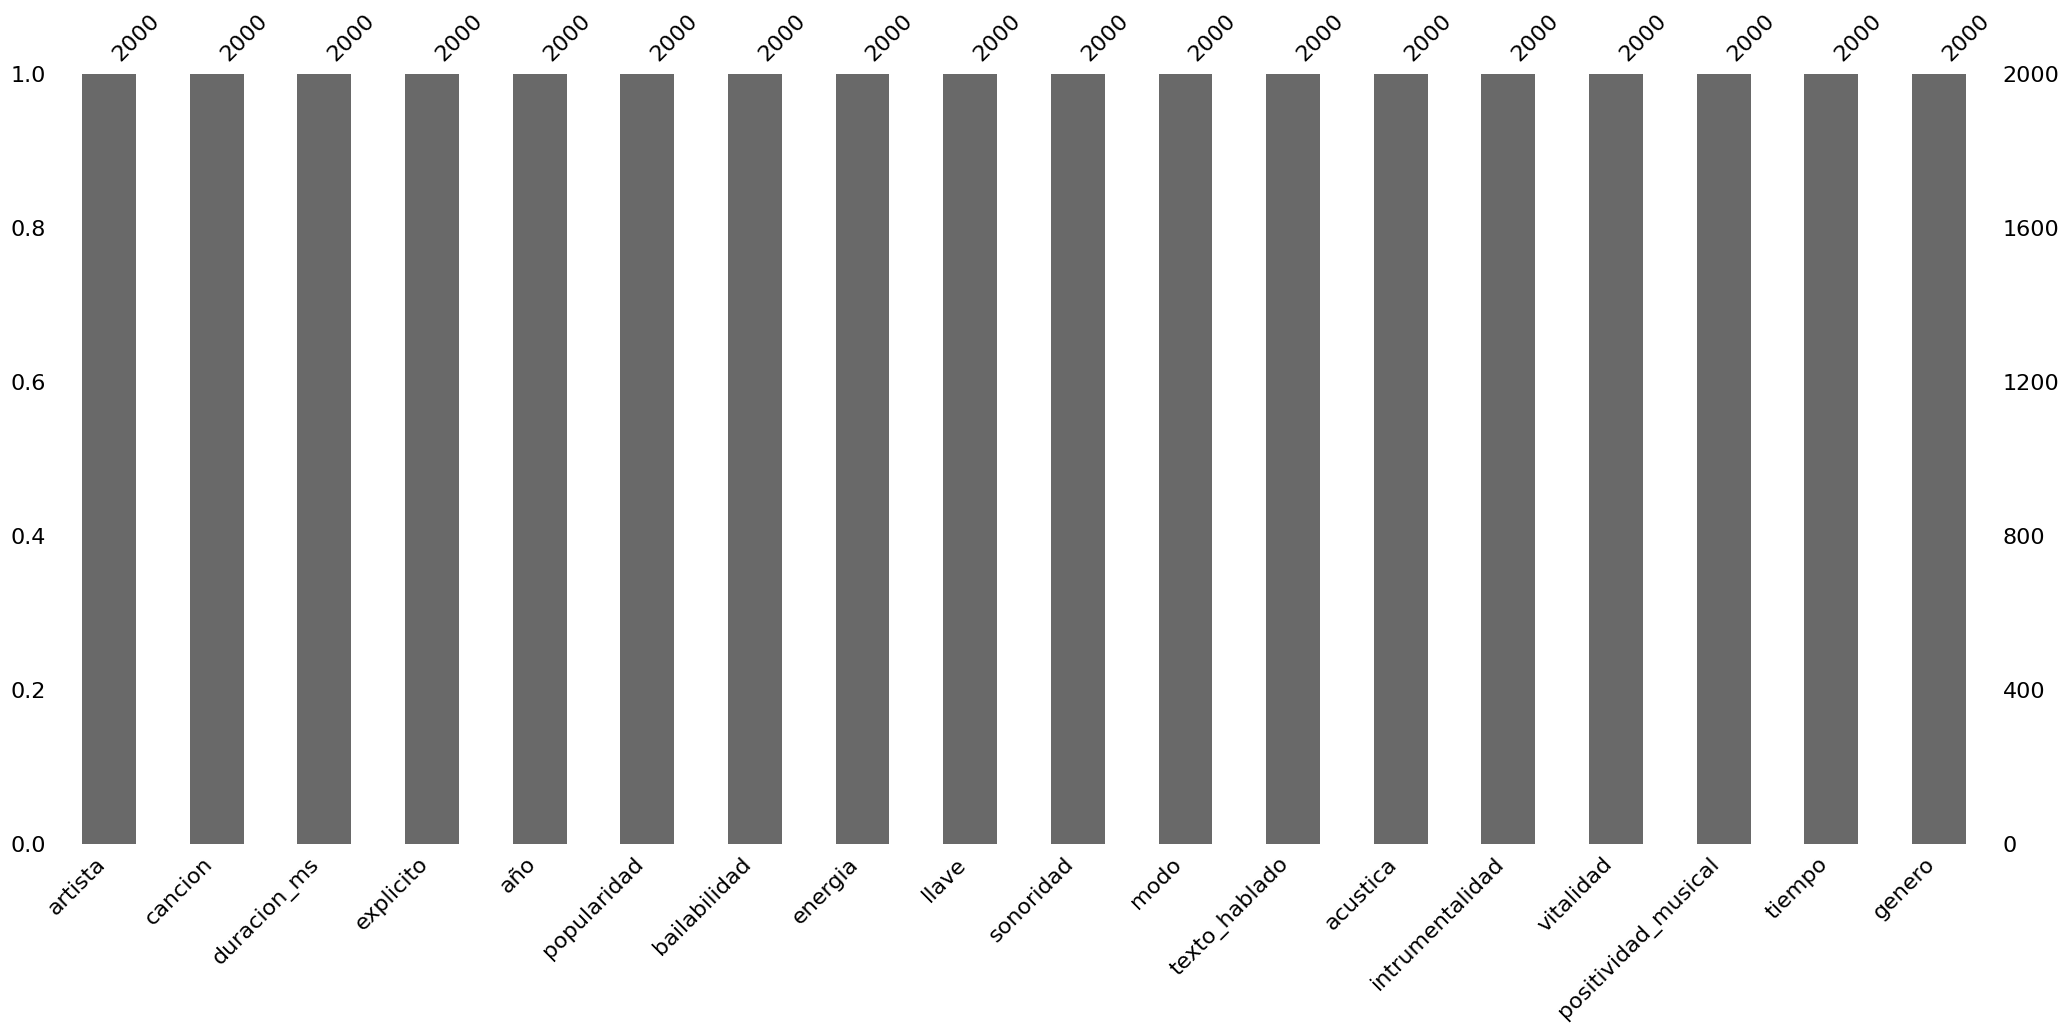

In [9]:
# Visualización de valores nulos
msno.bar(df2)
plt.show()

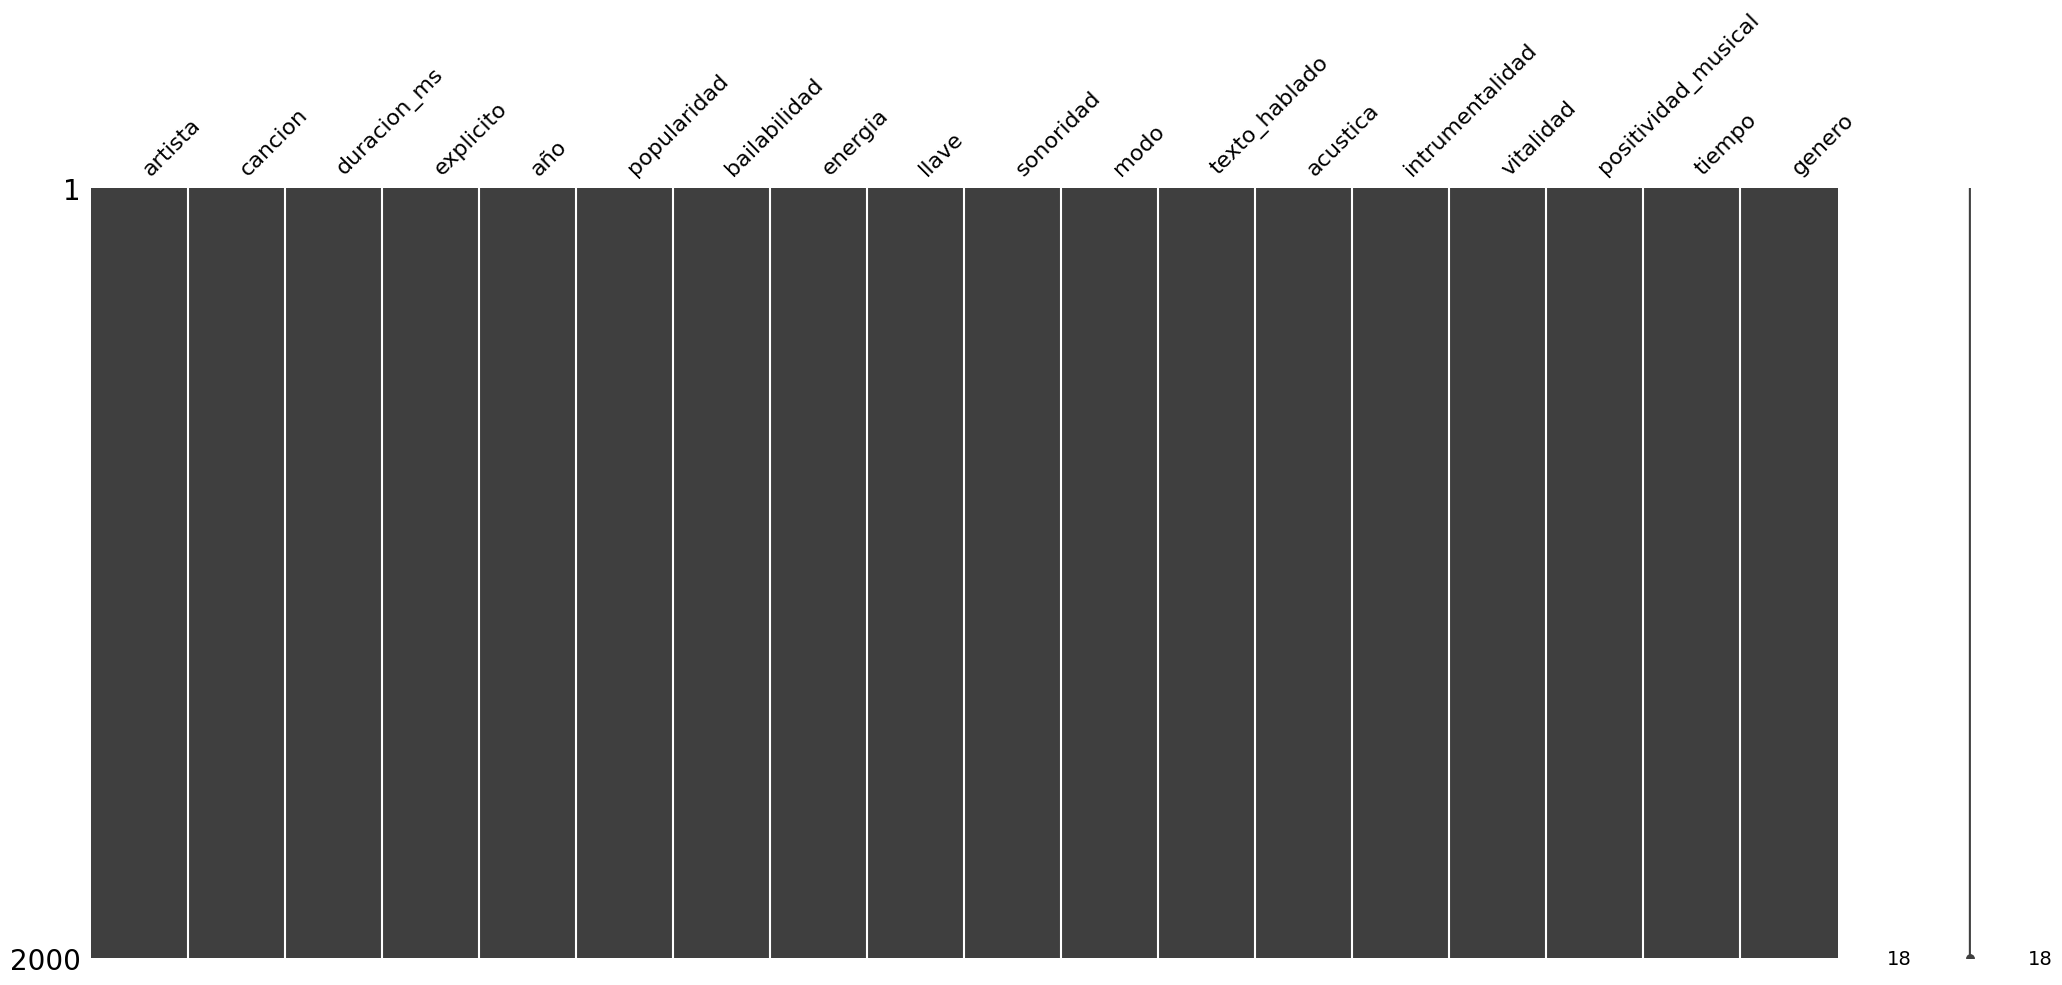

In [10]:
msno.matrix(df2)
plt.show()

In [11]:
df2["explicito"].unique()

array([False,  True])

In [12]:
df2["modo"].unique()

array([0, 1])

In [13]:
df2["llave"].unique()

array([ 1,  0,  7,  8,  2,  5,  6, 11,  3, 10,  9,  4])

In [14]:
df2["genero"].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [15]:
df2["cancion"].unique()

array(['Oops!...I Did It Again', 'All The Small Things', 'Breathe', ...,
       'The Git Up', 'Dancing With A Stranger (with Normani)', 'Circles'],
      dtype=object)

In [16]:
df2[["artista", "genero", "cancion","explicito"]][:5]

,artista,genero,cancion,explicito
0,Britney Spears,pop,Oops!...I Did It Again,False
1,blink-182,"rock, pop",All The Small Things,False
2,Faith Hill,"pop, country",Breathe,False
3,Bon Jovi,"rock, metal",It's My Life,False
4,*NSYNC,pop,Bye Bye Bye,False


In [17]:
# Análisis de duplicados
duplicados = df2.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")


Número de filas duplicadas: 59


In [18]:
# Eliminar duplicados si existen
if duplicados.any():
    df2 = df2.drop_duplicates()
    print("Duplicados eliminados.")

Duplicados eliminados.


In [19]:
# confirmar eliminados duplicados
duplicados = df2.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")


Número de filas duplicadas: 0


In [20]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df2.describe(include='all')


Estadísticas descriptivas:


,artista,cancion,duracion_ms,explicito,año,popularidad,bailabilidad,energia,llave,sonoridad,modo,texto_hablado,acustica,intrumentalidad,vitalidad,positividad_musical,tiempo,genero
count,1941,1941,1941.000000,1941,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941
unique,835,1879,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
top,Drake,Sorry,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop
freq,23,4,NaN,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,NaN,NaN,228594.973725,NaN,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442,NaN
std,NaN,NaN,39249.796103,NaN,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475,NaN
min,NaN,NaN,113000.000000,NaN,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,NaN
25%,NaN,NaN,203506.000000,NaN,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000,NaN
50%,NaN,NaN,223186.000000,NaN,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000,NaN
75%,NaN,NaN,247946.000000,NaN,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000,NaN


In [21]:
print(df2.dtypes)

artista                 object
cancion                 object
duracion_ms              int64
explicito                 bool
año                      int64
popularidad              int64
bailabilidad           float64
energia                float64
llave                    int64
sonoridad              float64
modo                     int64
texto_hablado          float64
acustica               float64
intrumentalidad        float64
vitalidad              float64
positividad_musical    float64
tiempo                 float64
genero                  object
dtype: object


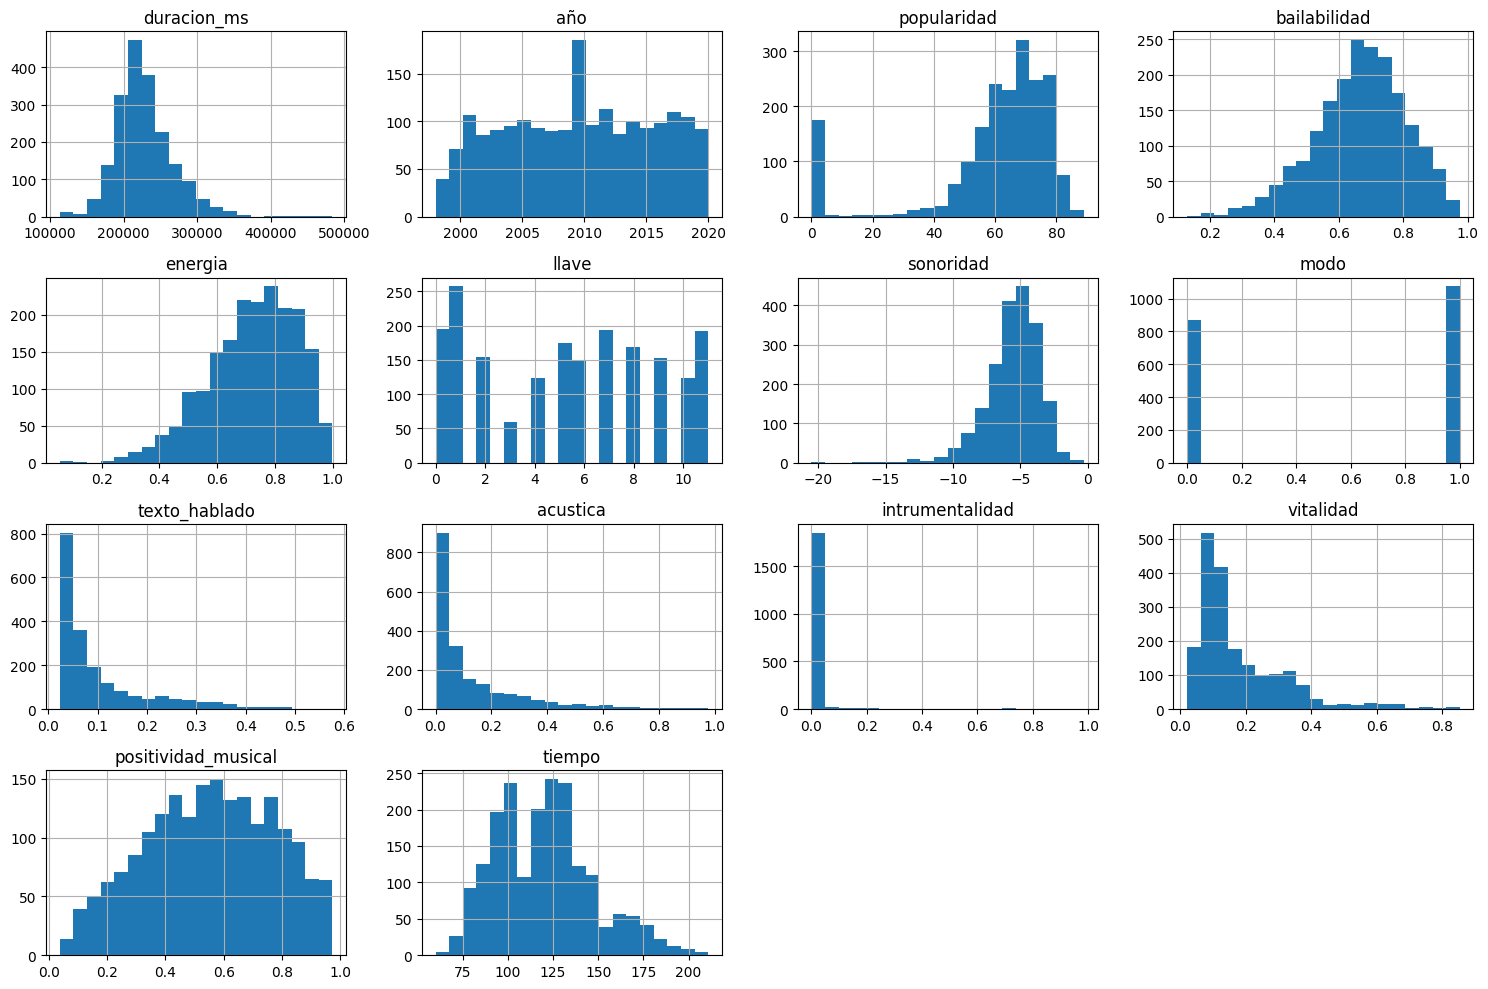

In [22]:
# Lista de columnas numéricas
columnas_numericas = df2.select_dtypes(include=['int64', 'float64']).columns

# Graficar histogramas
df2[columnas_numericas].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [23]:
df2["año"].unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

In [24]:
def recodificar_año(año):
    if año < 2006:
        return '1999-2005'
    elif 2006 <= año <= 2010:
        return '2006-2010'
    else:
        return '2011-2020'

# Aplicar la función a la columna 'edad'
df2['recodificar_año'] = df2['año'].apply(recodificar_año)

# Mostrar el DataFrame resultante
df2[["recodificar_año", "año","artista", "cancion","explicito"]][:5]

,recodificar_año,año,artista,cancion,explicito
0,1999-2005,2000,Britney Spears,Oops!...I Did It Again,False
1,1999-2005,1999,blink-182,All The Small Things,False
2,1999-2005,1999,Faith Hill,Breathe,False
3,1999-2005,2000,Bon Jovi,It's My Life,False
4,1999-2005,2000,*NSYNC,Bye Bye Bye,False


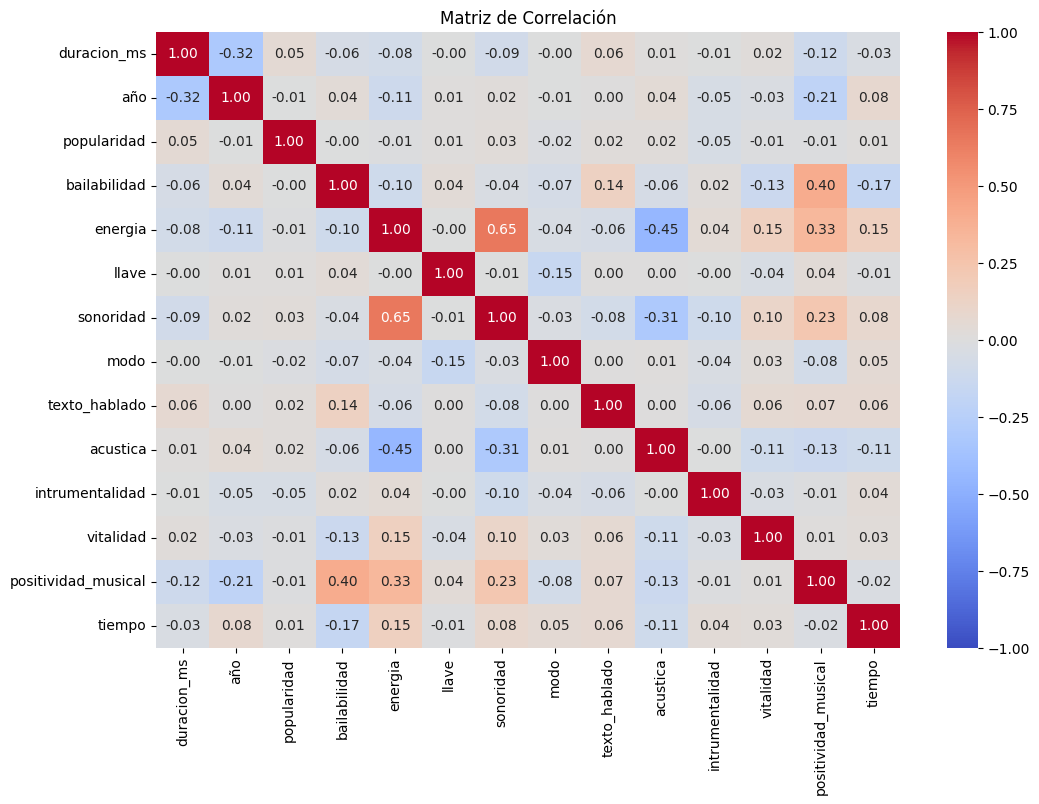

In [25]:
# Calcular matriz de correlación
matriz_corr = df2[columnas_numericas].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [26]:
numeric_cols = df2.select_dtypes(include=['int64', 'float64'])

CORRELACIONES POSITIVAS

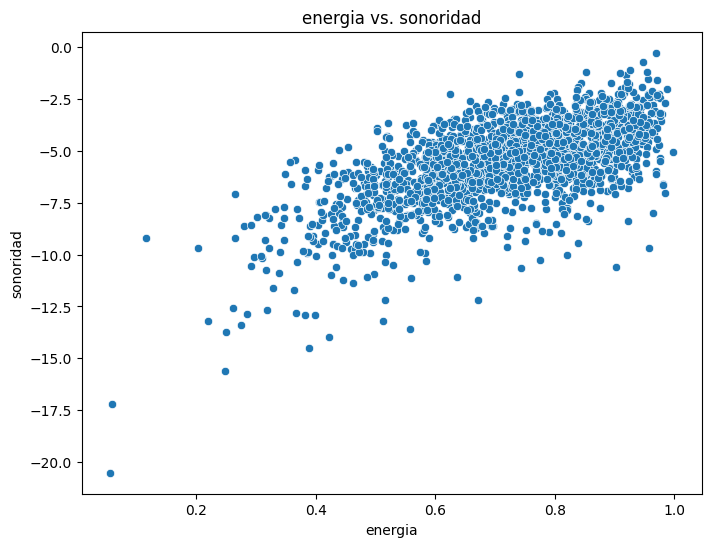

In [27]:
# Gráfico de dispersión entre sonoridad y energia
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='energia', y='sonoridad')
plt.title('energia vs. sonoridad')
plt.show()

In [ ]:
# la "valencia" es una de las características acústicas que se utiliza para describir el estado emocional de una canción.
#Se mide en una escala de 0 a 1, donde: 0 indica una sensación más negativa o melancólica. 1 sugiere una sensación más positiva o alegre.

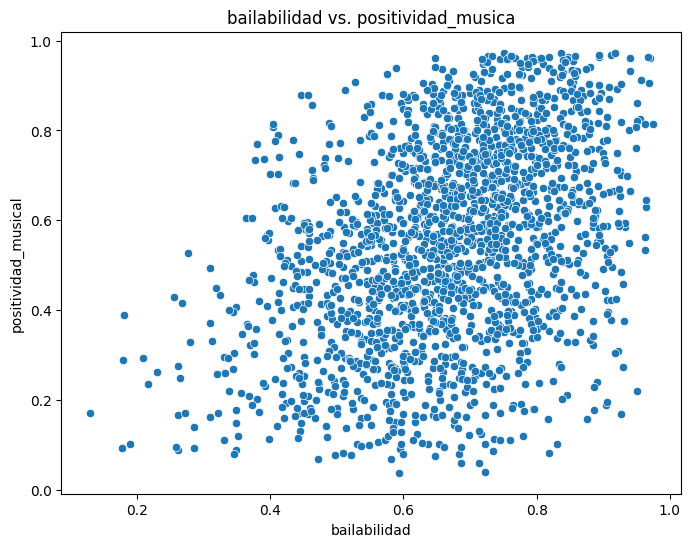

In [28]:
# Gráfico de dispersión entre bailabilidad y positividad_musica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='bailabilidad', y='positividad_musical')
plt.title('bailabilidad vs. positividad_musica')
plt.show()

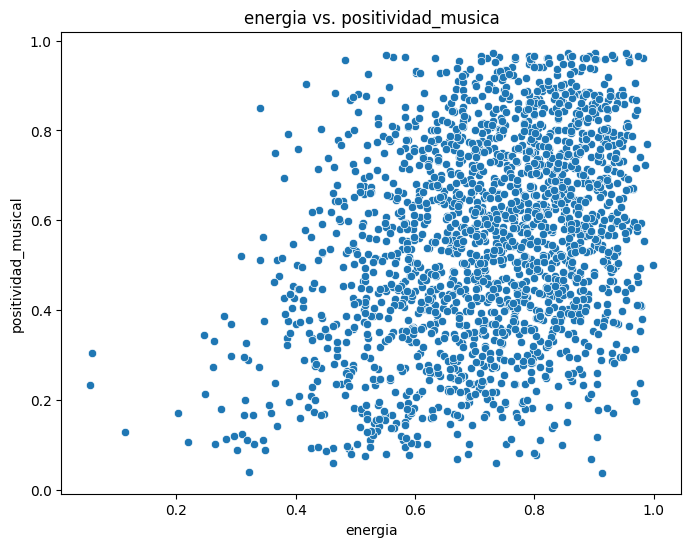

In [29]:
# Gráfico de dispersión entre energia y positividad_musica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='energia', y='positividad_musical')
plt.title('energia vs. positividad_musica')
plt.show()

In [72]:
fig = px.scatter(
    df2,
    x='energia',
    y='positividad_musical',
    color='artista',
    hover_data=['cancion'],
    title='Energía vs. positividad_musical',
)

fig.show()

CORRELACIONES NEGATIVAS

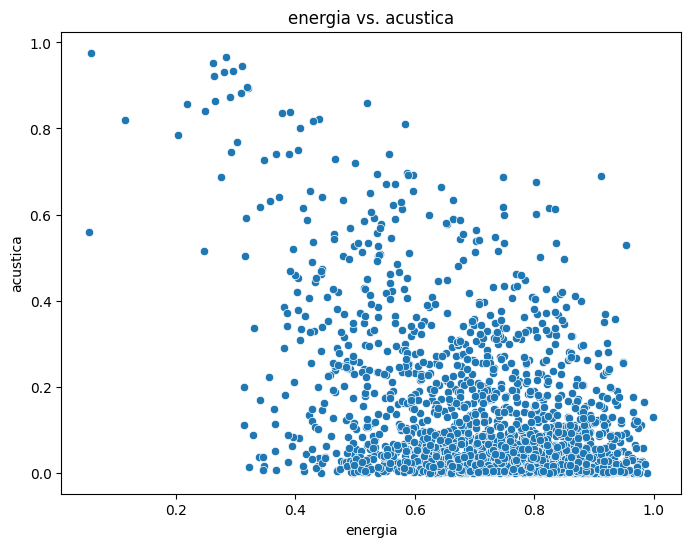

In [30]:
# Gráfico de dispersión entre energia y acustica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='energia', y='acustica')
plt.title('energia vs. acustica')
plt.show()

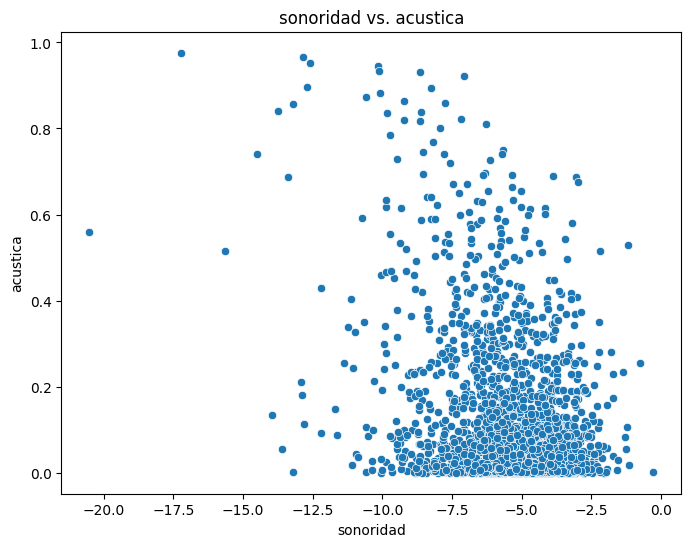

In [31]:
# Gráfico de dispersión entre sonoridad y acustica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='sonoridad', y='acustica')
plt.title('sonoridad vs. acustica')
plt.show()

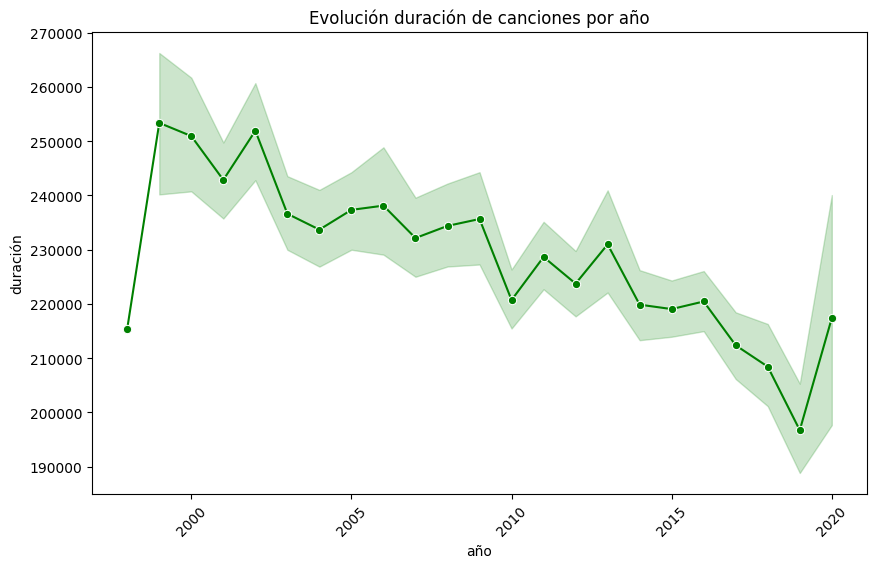

In [32]:
# año por duración
plt.figure(figsize=(10, 6))
sns.lineplot(x='año', y='duracion_ms', data=df2, marker='o', color='green')
plt.title('Evolución duración de canciones por año')
plt.xlabel('año')
plt.ylabel('duración')
plt.xticks(rotation=45)
plt.show()



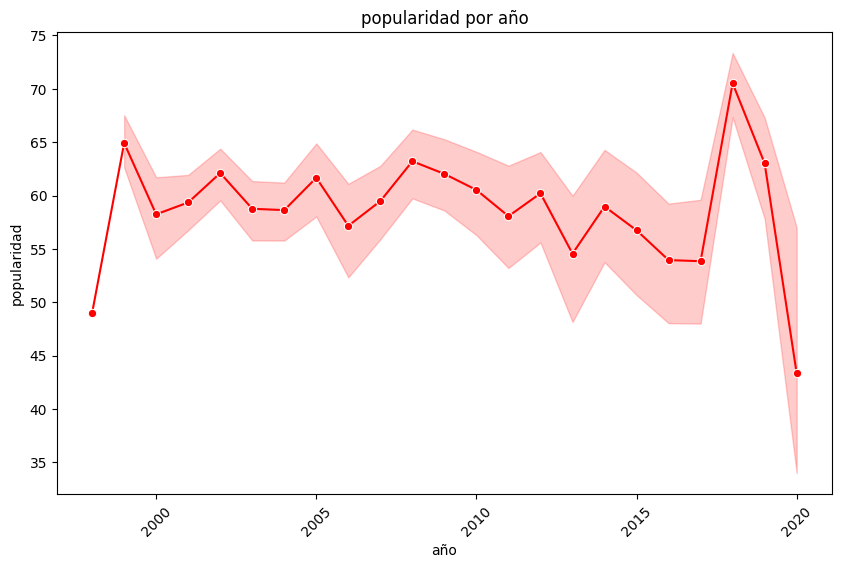

In [62]:
# popularidad por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='año', y='popularidad', data=df2, marker='o', color='r')
plt.title('popularidad por año')
plt.xlabel('año')
plt.ylabel('popularidad')
plt.xticks(rotation=45)
plt.show()


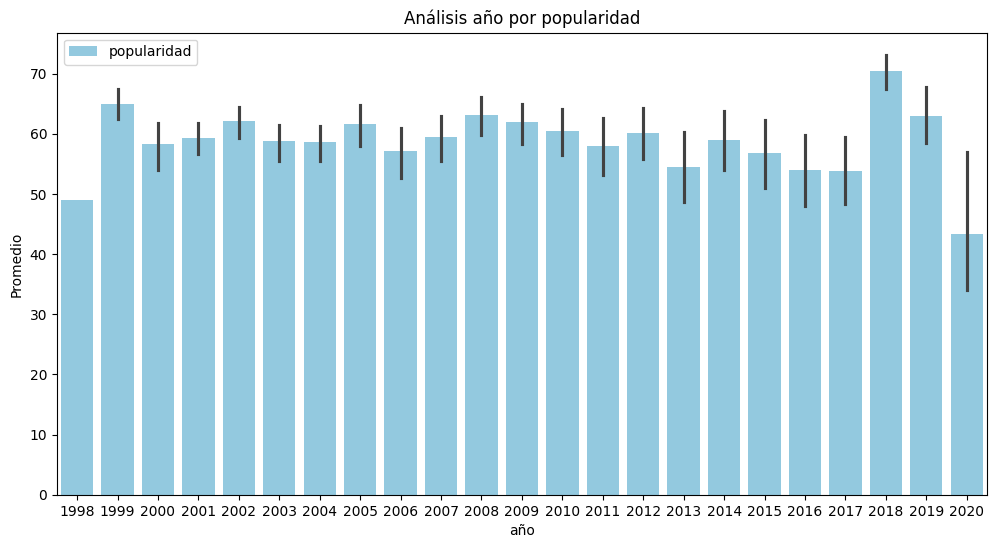

In [34]:
# Visualización de goles y asistencias promedio por patrocinador
plt.figure(figsize=(12, 6))
sns.barplot(x='año', y='popularidad', data=df2, color='skyblue', label='popularidad')

plt.title('Análisis año por popularidad')
plt.ylabel('Promedio')
plt.legend()
plt.show()

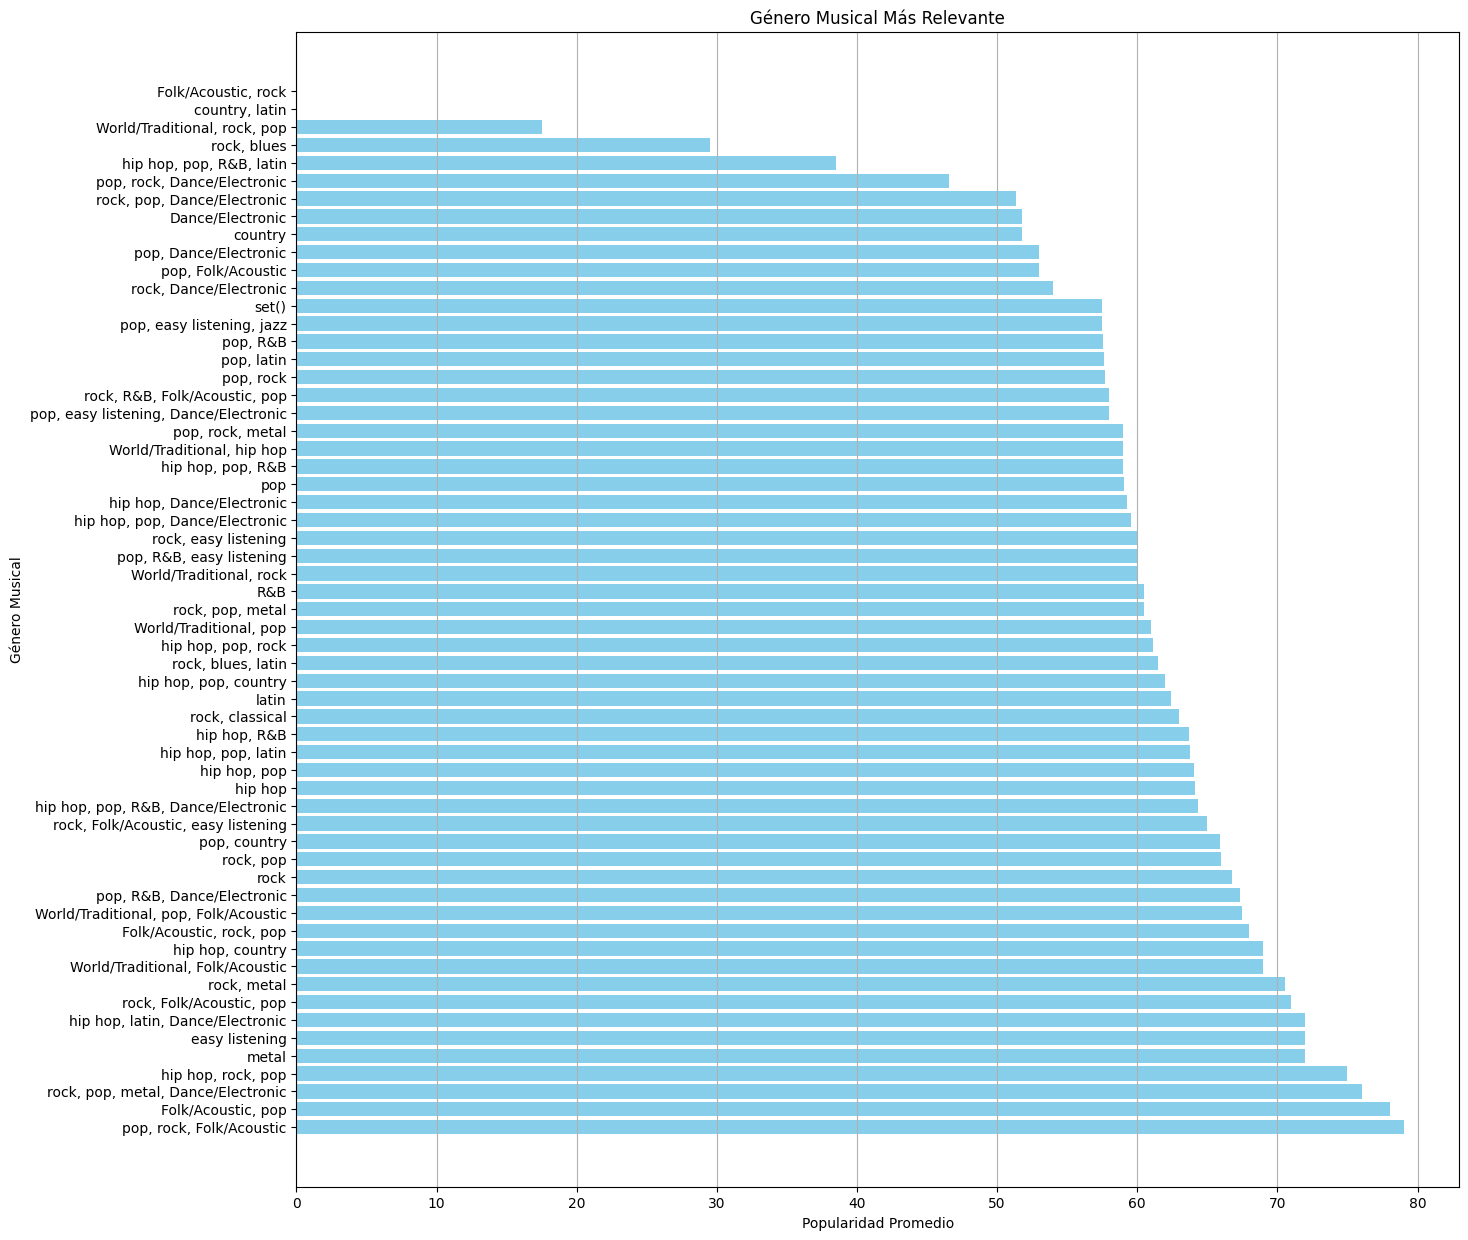

In [35]:
genre_relevance = df2.groupby('genero')['popularidad'].mean().reset_index()
genre_relevance = genre_relevance.sort_values(by='popularidad', ascending=False)

#Gráfico
plt.figure(figsize=(15, 15))
plt.barh(genre_relevance['genero'], genre_relevance['popularidad'], color='skyblue')
plt.title('Género Musical Más Relevante')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Género Musical')
plt.grid(axis='x')

# Mostrar el gráfico
plt.show()

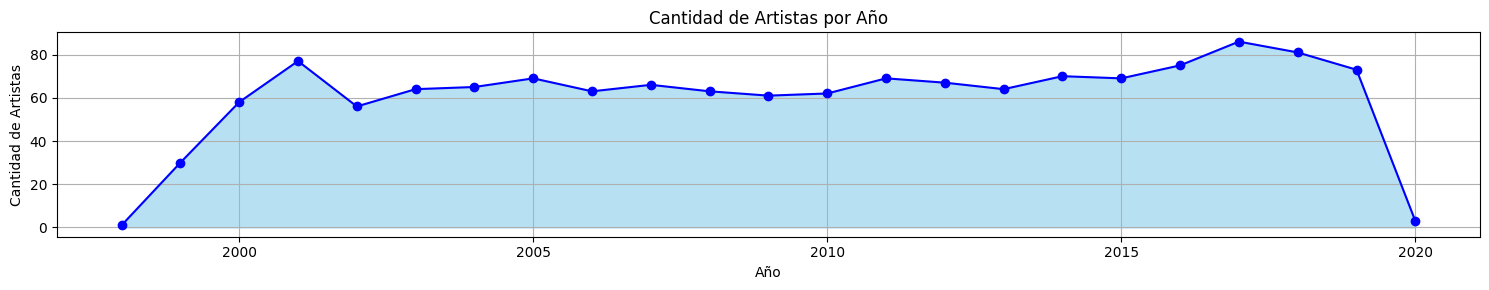

In [41]:
artists_per_year = df2.groupby('año')['artista'].nunique().reset_index()

# Graficar
plt.figure(figsize=(15, 3))
plt.fill_between(artists_per_year['año'], artists_per_year['artista'], color='skyblue', alpha=0.6)
plt.plot(artists_per_year['año'], artists_per_year['artista'], color='blue', marker='o')

# Personalizar el gráfico
plt.title('Cantidad de Artistas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Artistas')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [52]:
import plotly.express as px

In [53]:
top_songs = df2.sort_values(by='popularidad', ascending=False).head(10)

# Crear el gráfico de líneas
fig = px.line(
    top_songs,
    x='cancion',
    y='popularidad',
    hover_data=['artista'],
    title='10 canciones más populares',
    markers=True
)

# Mostrar la figura
fig.update_traces(line=dict(color='green'))
fig.show()

In [ ]:
# la "valencia" es una de las características acústicas que se utiliza para describir el estado emocional de una canción.
#Se mide en una escala de 0 a 1, donde: 0 indica una sensación más negativa o melancólica. 1 sugiere una sensación más positiva o alegre.

In [66]:
fig = px.histogram(
    df2,
    x='popularidad',
    title='Distribución de Popularidad de Canciones',
    nbins=30
)

fig.show()

análisis por género metal

In [70]:
metal_df2 = df2[df2['genero'] == 'metal']

In [71]:
import plotly.express as px

top_metal_songs = metal_df2.sort_values(by='popularidad', ascending=False).head(10)

fig1 = px.bar(
    top_metal_songs,
    x='cancion',
    y='popularidad',
    title='Top 10 Canciones de Metal Más Populares',
    labels={'cancion': 'Canciones', 'popularidad': 'Popularidad'},
)

fig1.show()

In [ ]:
#el "tempo" se refiere a la velocidad de una canción y se mide en beats per minute (BPM).
#Esta variable indica cuántos pulsos o beats hay en un minuto de música.

In [75]:
fig2 = px.scatter(
    metal_df2,
    x='tiempo',
    y='energia',
    color='artista',
    hover_data=['cancion'],
    title='Energía vs. Tempo de Canciones de Metal',
)

fig2.show()

In [9]:
# Agrupar por año y sumar popularidad
metal_energia = df2.groupby('año')['popularidad'].sum()
metal_energia

,popularidad
año,
1998,49
1999,2467
2000,4333
2001,6416
2002,5616
2003,5703
2004,5609
2005,6423
2006,5452


In [10]:
# Agrupar por año y sumar popularidad
metal_energia = df2.groupby('año')['popularidad'].sum()
metal_energia

,popularidad
año,
1998,49
1999,2467
2000,4333
2001,6416
2002,5616
2003,5703
2004,5609
2005,6423
2006,5452


In [11]:
idx_max = df2.groupby('genero')['popularidad'].idxmax()
idx_max

,popularidad
genero,
Dance/Electronic,1905
"Folk/Acoustic, pop",1571
"Folk/Acoustic, rock",59
"Folk/Acoustic, rock, pop",998
R&B,849
"World/Traditional, Folk/Acoustic",167
"World/Traditional, hip hop",311
"World/Traditional, pop",692
"World/Traditional, pop, Folk/Acoustic",592


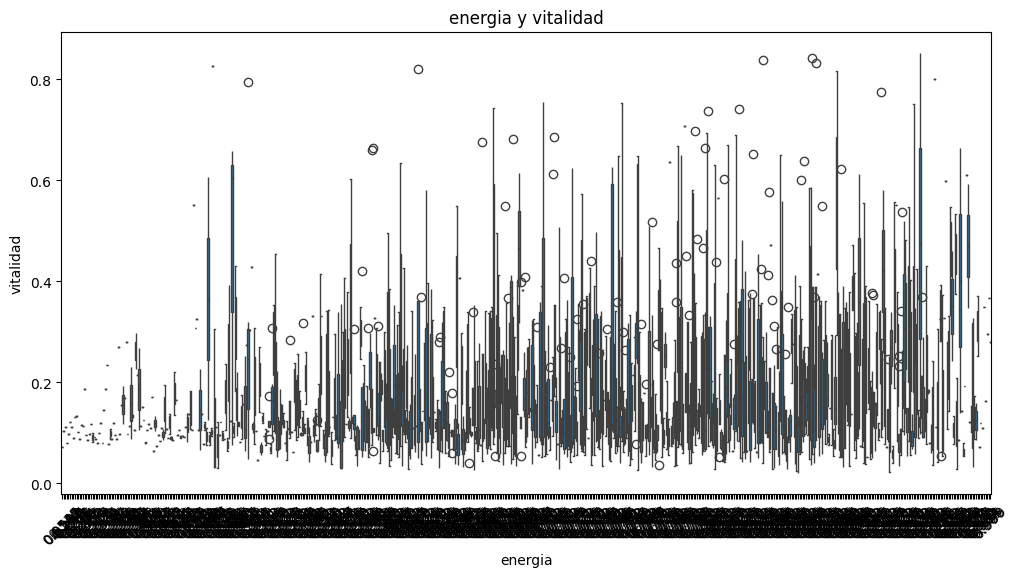

In [ ]:
# Diagrama de caja de energia y vitalidad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='energia', y='vitalidad')
plt.title('energia y vitalidad')
plt.xticks(rotation=45)
plt.show()


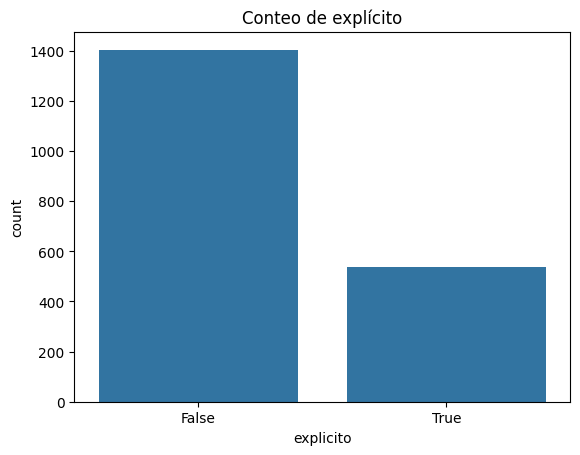

In [ ]:
# Gráfico de conteo para la variable objetivo 'Attrition'
sns.countplot(data=df2, x='explicito')
plt.title('Conteo de explícito')
plt.show()